### This notebook includes the data set statistics and plots used in the project report.

In [1]:
# adding dir to the Python path

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
%matplotlib inline

from scripts import feature_extraction
from scripts.utilities import build_pairs
import scripts.visualization as viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fe = feature_extraction.FeatureExtractor(input_dir='../metadata')
fe.read_aggregate()

Initial DataFrame done


In [4]:
print('Number of fanfics: ', fe.df.shape[0])

Number of fanfics:  82630


In [5]:
counts_dict = {}

for fandom_str in fe.df.fandom:
    fandoms = fandom_str.split(', ')   # although I didn't scrape any crossovers, multiple fandoms are allowed if one is a subfandom of the other
    for f in fandoms:
        counts_dict[f] = counts_dict.setdefault(f, 0) + 1
        
print('Number of unique fandoms: ', len(counts_dict))     # finest granularity of 'fandom'. Some groupings exist, but are not taken into account here.


Number of unique fandoms:  5695


In [6]:
print('Average hit count: ', fe.df.hits.mean())

Average hit count:  392.67222558392837


In [7]:
# Which are the 5 fandoms with the most fanfics?

top_counts = sorted(counts_dict.values(), reverse=True)[:5]

fandoms = [(key, value) for key, value in counts_dict.items() if counts_dict[key] in top_counts]
for i, f in enumerate(sorted(fandoms, key=lambda x: x[1], reverse=True)):
    print('{}. {}'.format(i+1, f[0]))

1. Marvel Cinematic Universe
2. Voltron: Legendary Defender
3. Pu nohiroakademia | Boku no Hero Academia | My Hero Academia
4. bangtansonyeondan | Bangtan Boys | BTS
5. Harry Potter - J. K. Rowling


The MCU fandom has the interesting property of being a meta-fandom – it combines more than 100 subfandoms (e.g. Captain America (Movies), Daredevil (TV) etc.). https://archiveofourown.org/tags/Marvel%20Cinematic%20Universe
Since 'no crossovers' was one of the AO3 filters I used on the data before scraping, if a fanfic is tagged with more than one fandom (fandom string is splittable by ', '), that means the fandoms have the same meaning, i.e. belong to a fandom group.

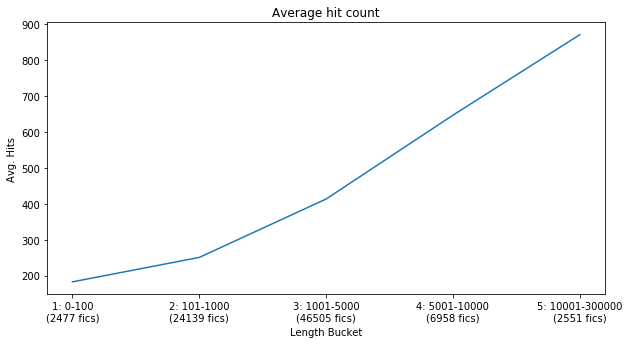

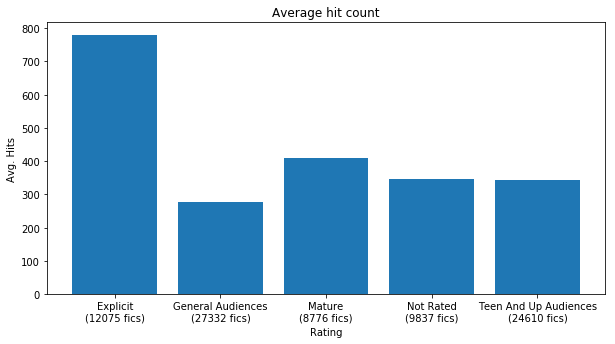

In [8]:
def avg_hits(df, buckets=None, attribute=None, order=None):
    
    if attribute and buckets:
        values_dict = {b: [0,0] for b in buckets}
    elif attribute: 
        buckets = df[attribute].unique()
        values_dict = {b: [0,0] for b in buckets}
        
    for b in buckets:
        if isinstance(b, range):
            filtered_df = df[df[attribute].isin(b)]
        else:
            filtered_df = df[df[attribute].str.startswith(b)]
        values_dict[b][0] = filtered_df.hits.mean()
        values_dict[b][1] = filtered_df.shape[0]
        
    if order and isinstance(buckets[0], range):       
        return {'{}: {}-{}\n({} fics)'.format(order[b], b.start, b.stop - 1,  values_dict[b][1]):  values_dict[b][0] for b in buckets}
    elif order:
        return {'{}: {}\n({} fics)'.format(order[b], b, values_dict[b][1]):  values_dict[b][0] for b in buckets}
    else:
        return {'{}\n({} fics)'.format(b, values_dict[b][1]): values_dict[b][0] for b in buckets}
    
    
buckets = [range(0,101), range(101, 1001), range(1001, 5001), range(5001, 10001), range(10001, 300001)]
order = {bucket: i+1 for i, bucket in enumerate(buckets)}
viz.draw(avg_hits(fe.df, buckets=buckets, attribute='words', order=order), 'Average hit count', 'Length Bucket', 'Avg. Hits', 'line')

viz.draw(avg_hits(fe.df, attribute='rating'), 'Average hit count', 'Rating', 'Avg. Hits', 'bar')

In [9]:
fe.filter_df(fandom='Marvel Cinematic Universe')
print('Number of fanfics in the MCU fandom: ', fe.df.shape[0])

Number of fanfics in the MCU fandom:  3620


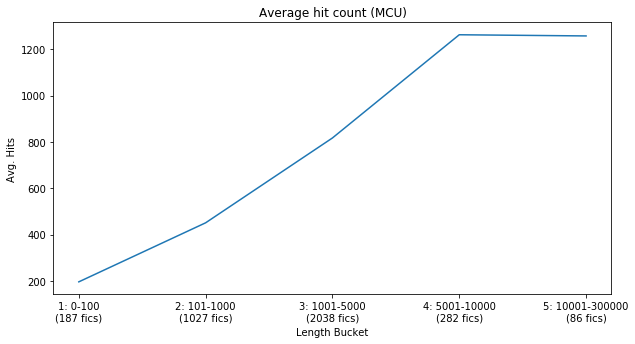

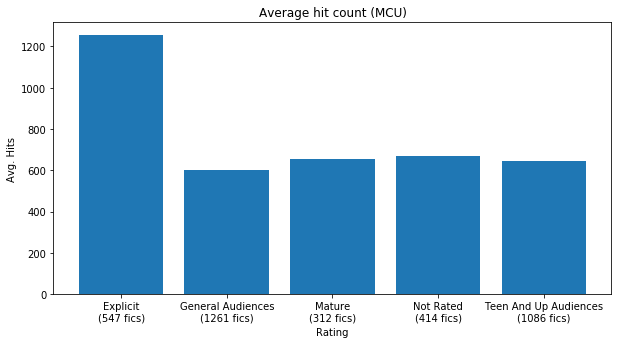

In [10]:
viz.draw(avg_hits(fe.df, buckets=buckets, attribute='words', order=order), 'Average hit count (MCU)', 'Length Bucket', 'Avg. Hits', 'line')

viz.draw(avg_hits(fe.df, attribute='rating'), 'Average hit count (MCU)', 'Rating', 'Avg. Hits', 'bar')

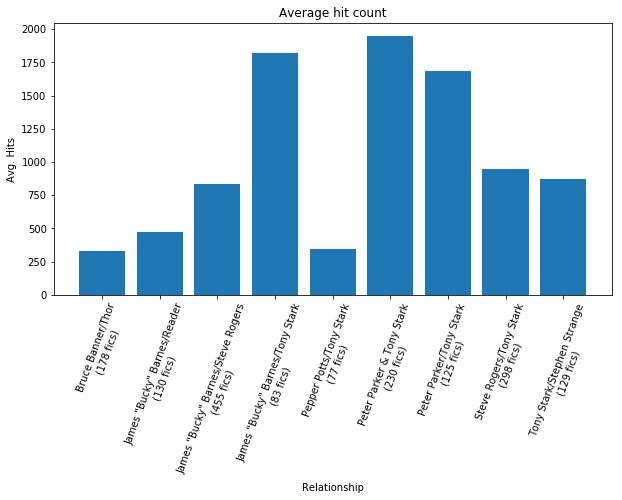

In [11]:
rels_dict = {}

for rels_str in fe.df.relationship:
    rels = rels_str.split(', ')
    for r in rels:
        rels_dict[r] = rels_dict.setdefault(r, 0) + 1

top_rels = sorted(rels_dict.values(), reverse=True)[:10]
rels = [key for key in rels_dict if rels_dict[key] in top_rels and key]

viz.draw(avg_hits(fe.df, attribute='relationship', buckets=rels), 'Average hit count', 'Relationship', 'Avg. Hits', 'bar', rotation=70)

***

## Feature Extraction

In [12]:
# Prepping

fe.prep()

cleaned done
cl_title done
tags_list done
cl_tags done
rels_list done
chars_list done
Prepping done


In [13]:
# Actual feature extraction

fe.extract()

All features added 


In [14]:
fe.normalize()

In [15]:
fe.save_features(output_dir='output', filename='mcu')

In [16]:
pairs_time_controlled = build_pairs(fe.df, save='output/tc_mcu_pairs.p')

In [17]:
len(pairs_time_controlled)

1996

### The feature extraction process is repeated for the second and third largest fandoms - 'Voltron: Legendary Defender' and 'My Hero Academia'. Files saved in ./output